# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [3]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [4]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    return numpy.sin(x)*(x**2)

Ensure your function works with numpy arrays:

In [5]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [6]:
def g(x):
    '''Analytical integral of f(x).'''
    return (2*x)*(numpy.sin(x))+(2-x**2)*(numpy.cos(x))-2 ;

Check your solution with the same numpy array:

In [8]:
assert g(0) == 0.

In [9]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [7]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    return g(xmax)-g(xmin);


Check your analytic function:

In [ ]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [8]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    h = (xmax - xmin)/N
    integral = 0
    for i in range (0,N):
        integral += (h/6)*(f(h*i)+4*f(h*(i+(1/2)))+f(h*(i+1)))
    return integral;

Make sure you have implemented Simpson's rule correctly:

In [ ]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [ ]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


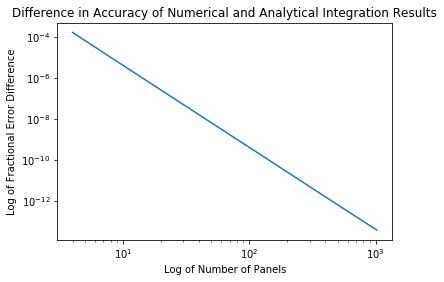

In [17]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

numerical_integrals = []
for i in panel_counts:
    numerical_integrals.append(integrate_numeric(x0, x1, i))
fractional_errors = []
for i in numerical_integrals:
    fractional_errors.append(abs(result_analytic-i)/result_analytic)
plt.plot(panel_counts,fractional_errors)
plt.yscale("log")
plt.xscale("log")
plt.ylabel("Log of Fractional Error Difference")
plt.xlabel("Log of Number of Panels")
plt.title("Difference in Accuracy of Numerical and Analytical Integration Results")
plt.show()

What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Incresing the number of panels increase the accuracy of Simpson's rule as the absolute error is inversely proportional to the number of panels to the power of 4. When the number of panels is too large the error of the estimate of the area is so small it is insignificant.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Increasing the number of panels would increase the accuracy of the trapezium rule but not as much as Simpson's Rule as the absolte error is inversely proportional to the number of panels to the power of 4.